In [1]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import squarify
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns
import matplotlib as mp
from pprint import pprint

In [2]:
#Pull Data from DataDragon to create DF of Champion name with their ChampionID
champions_data = pd.read_json(r'file:///Users/jw/Downloads/dragontail-10.21.1/10.21.1/data/en_US/champion.json')

#Initialising_dictionary
champion_dict = champions_data['data']

#Split Dictionary into Keys and Values
character = []
values = []
items = champion_dict.items()
for item in items:
    character.append(item[0]), values.append(item[1])

ID = []
for v in values:
    ID.append(v['key'])

Role = []
for x in values:
    Role.append(x['tags'][0])

champion_data_1 = pd.DataFrame({"Champion Name": character, "championId": ID, "Primary Role": Role})

#change data type to int64 - in order to merge 
champion_data_1['championId'] = champion_data_1['championId'].astype(str).astype(int).round(0)

In [7]:
#Make Full Iron DF - Ready for analysis
final_iron_df = full_summoner_mastery[full_summoner_mastery["tier"] == "IRON"]

#Merge full Iron DF with champion data
iron_combined_df = pd.merge(final_iron_df, champion_data_1, how = 'left', on = 'championId')

#Delete duplicate column
del iron_combined_df["Champion Name_x"]

#Rename column
iron_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make Full bronze DF - ready for analysis
final_bronze_df = full_summoner_mastery[full_summoner_mastery["tier"] == "BRONZE"]

bronze_combined_df = pd.merge(final_bronze_df, champion_data_1, how = 'left', on = 'championId')

del bronze_combined_df["Champion Name_x"]

bronze_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make Full Silver DataFrame - Ready for analysis
final_silver_df = full_summoner_mastery[full_summoner_mastery["tier"] == "SILVER"]

silver_combined_df = pd.merge(final_silver_df, champion_data_1, how = 'left', on = 'championId')

del silver_combined_df["Champion Name_x"]

silver_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make full gold DF - ready for analysis
full_summoner_mastery = pd.read_csv('summoner_champion.csv')

final_gold_df = full_summoner_mastery[full_summoner_mastery["tier"] == "GOLD"]

gold_combined_df = pd.merge(final_gold_df, champion_data_1, how = 'left', on = 'championId')

del gold_combined_df["Champion Name_x"]

gold_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make full platinum DataFrame - everything we need for analysis
final_platinum_df = full_summoner_mastery[full_summoner_mastery["tier"] == "PLATINUM"]

platinum_combined_df = pd.merge(final_platinum_df, champion_data_1, how = 'left', on = 'championId')

del platinum_combined_df["Champion Name_x"]

platinum_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Full DataFrame for Diamond, Master, GrandMaster and Challenger - combined into one
Diamond = full_summoner_mastery[full_summoner_mastery["tier"] == "DIAMOND"]
Master = full_summoner_mastery[full_summoner_mastery["tier"] == "MASTER"]
Grandmaster = full_summoner_mastery[full_summoner_mastery["tier"] == "GRANDMASTER"]
Challenger = full_summoner_mastery[full_summoner_mastery["tier"] == "CHALLENGER"]

DMGC = [Diamond, Master, Grandmaster, Challenger]
DMGC_df = pd.concat(DMGC)

DMGC_combined_df = pd.merge(DMGC_df, champion_data_1, how = 'left', on = 'championId')


del DMGC_combined_df["Champion Name_x"]

DMGC_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

In [37]:
junior = [iron_combined_df, bronze_combined_df, silver_combined_df, gold_combined_df, platinum_combined_df]

junior_df = pd.concat(junior)

junior_combined_df = pd.merge(junior_df, champion_data_1, how = 'left', on = 'championId')

del junior_combined_df["Champion Name_x"]

junior_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

In [61]:
junior_combined_df.head()

,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,...,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,Primary Role_x,Champion Name,Primary Role_y
0,51d62285-420e-4e09-813a-22e518e15844,RANKED_SOLO_5x5,IRON,III,iwYkKmc50N7tviugmz8N75_vWKNtwc0U-tIq_DA_7CO9MpQ,SGTkiller477,28,3,11,False,...,6.0,138680.0,1.600060e+12,117080.0,0.0,True,2.0,Marksman,Jinx,Marksman
1,e14a4f7a-1451-44be-b3f1-1679c3086b80,RANKED_SOLO_5x5,IRON,III,rWYmgWYac_r6weUZmbwgBciS_gV1iARNnbReYFgDRrYaZXA,Skt T1 AMTQ,11,2,8,False,...,7.0,125120.0,1.601490e+12,103520.0,0.0,True,0.0,Fighter,Yasuo,Fighter
2,e49eeb93-02ff-4338-bd4e-c42100028271,RANKED_SOLO_5x5,IRON,III,Y8IZlfbQCfKscMSV-CN8lxxNy6Eau6Go4yo7zwbekOUP4P4,DaBrownGuy,71,9,8,False,...,5.0,93088.0,1.598540e+12,71488.0,0.0,False,2.0,Marksman,Quinn,Marksman
3,74c75b60-a755-4f58-a9ab-a5772c366d2c,RANKED_SOLO_5x5,IRON,III,Ln7Aw9RlPFc7e7u5s3l7ixtnzdOGkKBbI6auMsVjEiIR59E,Aaeandar,24,3,8,False,...,5.0,99542.0,1.603090e+12,77942.0,0.0,True,0.0,Mage,Neeko,Mage
4,0ebee842-0cfa-45e0-9a50-824a954ae551,RANKED_SOLO_5x5,IRON,III,spf8A0gXVRwqvmfSBAUyBnzsmToRkBHg370YzTNHaSSilM8,FabiLeonardo,65,4,10,False,...,6.0,99626.0,1.597980e+12,78026.0,0.0,True,1.0,Mage,Ahri,Mage


In [31]:
iron_combined_df.head()

,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,...,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,Champion Name,Primary Role
0,51d62285-420e-4e09-813a-22e518e15844,RANKED_SOLO_5x5,IRON,III,iwYkKmc50N7tviugmz8N75_vWKNtwc0U-tIq_DA_7CO9MpQ,SGTkiller477,28,3,11,False,...,222.0,6.0,138680.0,1.600060e+12,117080.0,0.0,True,2.0,Jinx,Marksman
1,e14a4f7a-1451-44be-b3f1-1679c3086b80,RANKED_SOLO_5x5,IRON,III,rWYmgWYac_r6weUZmbwgBciS_gV1iARNnbReYFgDRrYaZXA,Skt T1 AMTQ,11,2,8,False,...,157.0,7.0,125120.0,1.601490e+12,103520.0,0.0,True,0.0,Yasuo,Fighter
2,e49eeb93-02ff-4338-bd4e-c42100028271,RANKED_SOLO_5x5,IRON,III,Y8IZlfbQCfKscMSV-CN8lxxNy6Eau6Go4yo7zwbekOUP4P4,DaBrownGuy,71,9,8,False,...,133.0,5.0,93088.0,1.598540e+12,71488.0,0.0,False,2.0,Quinn,Marksman
3,74c75b60-a755-4f58-a9ab-a5772c366d2c,RANKED_SOLO_5x5,IRON,III,Ln7Aw9RlPFc7e7u5s3l7ixtnzdOGkKBbI6auMsVjEiIR59E,Aaeandar,24,3,8,False,...,518.0,5.0,99542.0,1.603090e+12,77942.0,0.0,True,0.0,Neeko,Mage
4,0ebee842-0cfa-45e0-9a50-824a954ae551,RANKED_SOLO_5x5,IRON,III,spf8A0gXVRwqvmfSBAUyBnzsmToRkBHg370YzTNHaSSilM8,FabiLeonardo,65,4,10,False,...,103.0,6.0,99626.0,1.597980e+12,78026.0,0.0,True,1.0,Ahri,Mage


In [62]:
Diamond = full_summoner_mastery[full_summoner_mastery["tier"] == "DIAMOND"][:100]


,leagueId,queueType,tier,rank,summonerId,summonerName,leaguePoints,wins,losses,veteran,...,miniSeries,championId,championLevel,championPoints,lastPlayTime,championPointsSinceLastLevel,championPointsUntilNextLevel,chestGranted,tokensEarned,Champion Name
28524,9abfca46-cedb-45b4-b2b1-220edd0fe5f5,RANKED_SOLO_5x5,DIAMOND,III,Gb2F2E3ISV0W_qNTWmokWeWu2t1gexzX_JrH9N4WSYpJAxk,4u Xayah,0,260,202,False,...,NaN,157.0,7.0,250623.0,1.601400e+12,229023.0,0.0,True,0.0,Yasuo
28525,262186f5-8a3c-4e80-8691-cd896bcd835b,RANKED_SOLO_5x5,DIAMOND,III,oavZ6Ipr-Gu0GEGzDOZS0UHooC_P3n3uR46BvT5c-69pfgI,Darrison,10,99,97,False,...,NaN,37.0,7.0,372886.0,1.602970e+12,351286.0,0.0,True,0.0,Sona
28526,7cf1753d-9ac8-4cf6-962b-bbf096a93263,RANKED_SOLO_5x5,DIAMOND,III,s4xD2k6bArZvX4DgLEiHl9mxLugitw8b6fQD2SyEHER5y6I,tenidakiel,85,59,62,False,...,NaN,53.0,6.0,167863.0,1.600220e+12,146263.0,0.0,True,0.0,Blitzcrank
28527,851025be-0a02-487f-a06d-00cf37bb704c,RANKED_SOLO_5x5,DIAMOND,III,HvpEwbYdFGLb6jXHusCem6qnnG_2XH9onSYLVJAAAICGRbk,DaC4ptain,22,160,138,False,...,NaN,55.0,5.0,61320.0,1.603320e+12,39720.0,0.0,True,2.0,Katarina
28528,ae083362-896e-4632-a92a-d812e7d36b31,RANKED_SOLO_5x5,DIAMOND,III,u-vAsLy9Aapj1b5f5FcgEjEli-iZGgKiCqKLoThOBPvJXkU,yonyGOD,15,282,267,False,...,NaN,42.0,7.0,545050.0,1.603260e+12,523450.0,0.0,True,0.0,Corki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28619,68ffa336-7735-4d29-a26b-bcd75f4bccec,RANKED_SOLO_5x5,DIAMOND,III,#NAME?,uhhyeahh,100,277,282,False,...,"{'target': 2, 'wins': 0, 'losses': 0, 'progres...",110.0,5.0,31896.0,1.580620e+12,10296.0,0.0,False,2.0,Varus
28620,68ffa336-7735-4d29-a26b-bcd75f4bccec,RANKED_SOLO_5x5,DIAMOND,III,#NAME?,uhhyeahh,100,277,282,False,...,"{'target': 2, 'wins': 0, 'losses': 0, 'progres...",54.0,5.0,55352.0,1.603350e+12,33752.0,0.0,False,2.0,Malphite
28621,68ffa336-7735-4d29-a26b-bcd75f4bccec,RANKED_SOLO_5x5,DIAMOND,III,#NAME?,uhhyeahh,100,277,282,False,...,"{'target': 2, 'wins': 0, 'losses': 0, 'progres...",19.0,5.0,64221.0,1.596620e+12,42621.0,0.0,True,0.0,Warwick
28622,68ffa336-7735-4d29-a26b-bcd75f4bccec,RANKED_SOLO_5x5,DIAMOND,III,#NAME?,uhhyeahh,100,277,282,False,...,"{'target': 2, 'wins': 0, 'losses': 0, 'progres...",141.0,4.0,15577.0,1.601880e+12,2977.0,6023.0,True,0.0,Kayn


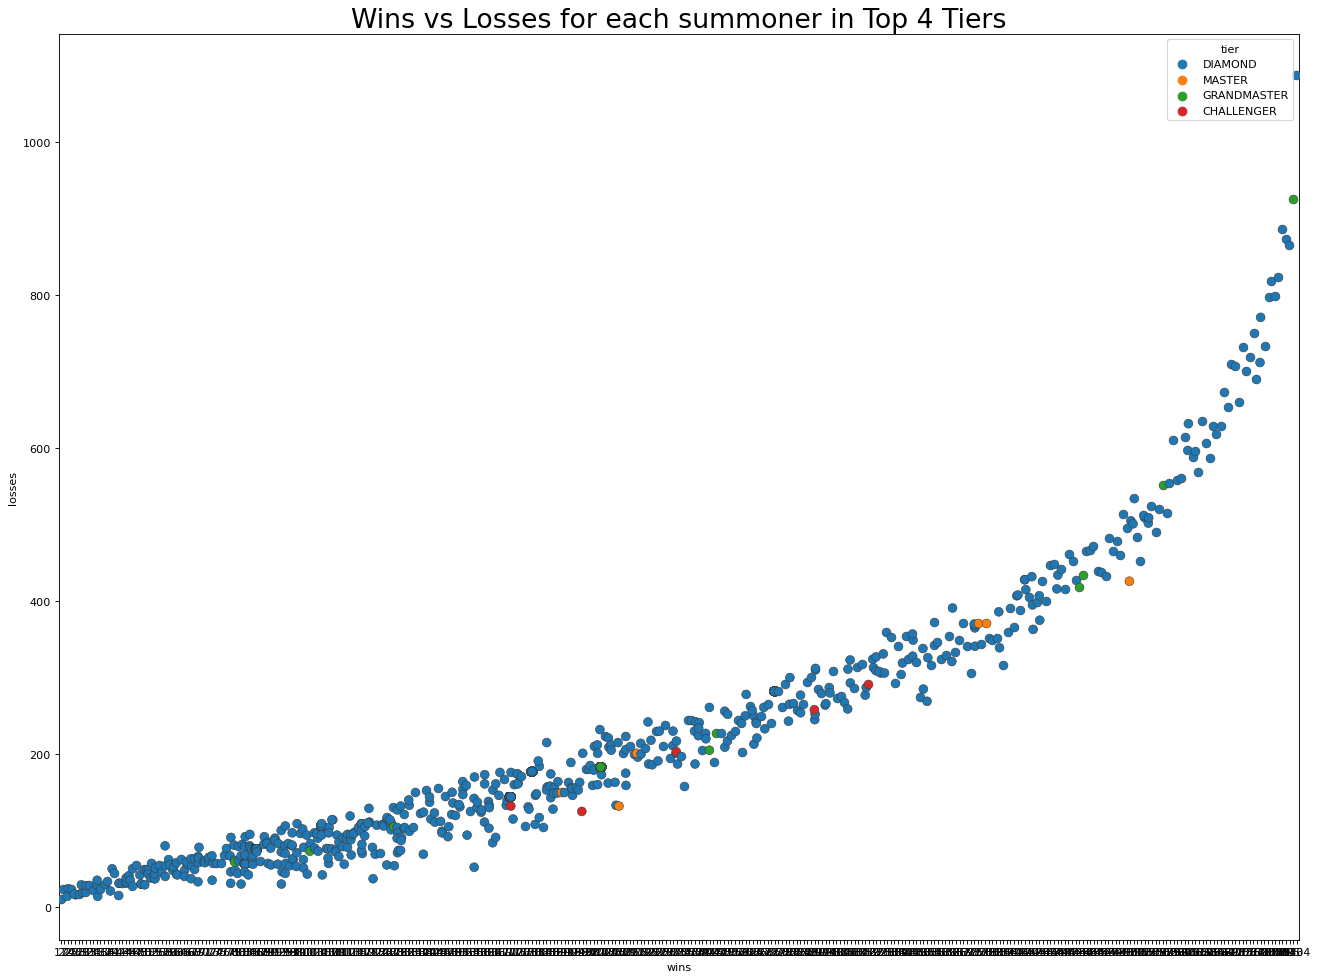

In [63]:
# Draw Stripplot
tier = DMGC_combined_df['tier']
fig, ax = plt.subplots(figsize=(20,15), dpi= 80)    
sns.stripplot(DMGC_combined_df.wins, DMGC_combined_df.losses, hue = tier, jitter=0.25, size=8, ax=ax, linewidth=.5)


#plt.xticks(np.arange(0, len(clean_gold_df.wins) + 1, 300))
#frequency=100

# Decorations
plt.title('Wins vs Losses for each summoner in Top 4 Tiers', fontsize=24)
plt.show()

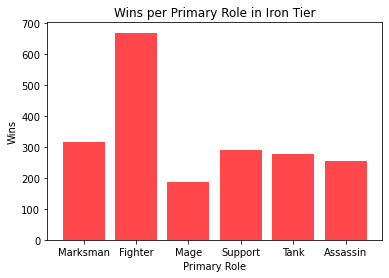

In [20]:
role = iron_combined_df['Primary Role']
wins = iron_combined_df['wins']

plt.bar(role,wins, align = "center", color= 'xkcd:light red')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Iron Tier')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

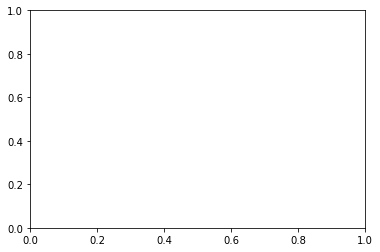

In [28]:
##Broken
role = bronze_combined_df['Primary Role']
wins = bronze_combined_df['wins']

plt.bar(role,wins, align = "center", color= 'xkcd:light red')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Bronze Tier')
plt.show()

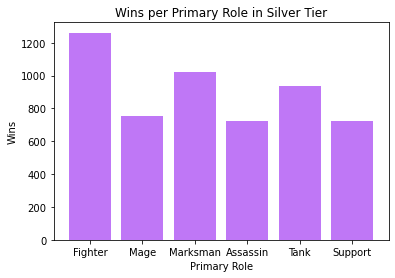

In [22]:
role = silver_combined_df['Primary Role']
wins = silver_combined_df['wins']

plt.bar(role,wins, align = "center", color= 'xkcd:light purple')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Silver Tier')
plt.show()

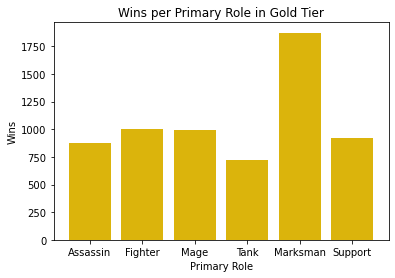

In [23]:
role = gold_combined_df['Primary Role']
wins = gold_combined_df['wins']

#order = ['Assassin', 'Fighter', 'Mage', 'Tank', 'Marksman', 'Support']

plt.bar(role,wins, align = "center", color= 'xkcd:gold')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Gold Tier')
plt.show()

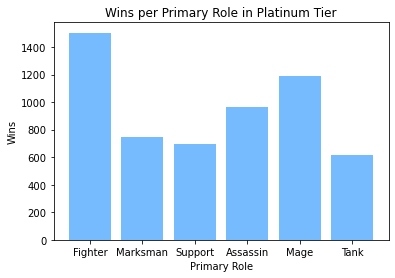

In [24]:
role = platinum_combined_df['Primary Role']
wins = platinum_combined_df['wins']

#order = ['Assassin', 'Fighter', 'Mage', 'Tank', 'Marksman', 'Support']

plt.bar(role,wins, align = "center", color= 'xkcd:sky blue')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Platinum Tier')
plt.show()

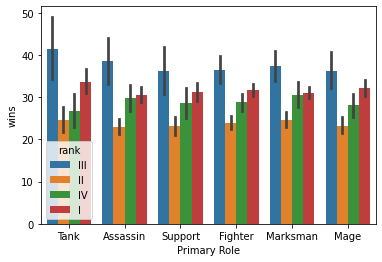

In [50]:
sns.barplot(y = 'wins', x = 'Primary Role', hue = 'rank', data=  bronze_combined_df)

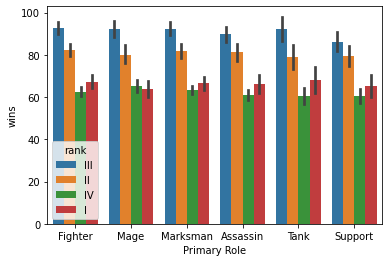

In [51]:
sns.barplot(y = 'wins', x = 'Primary Role', hue = 'rank', data=  silver_combined_df)

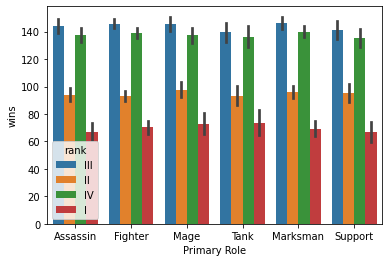

In [52]:
sns.barplot(y = 'wins', x = 'Primary Role', hue = 'rank', data=  gold_combined_df)

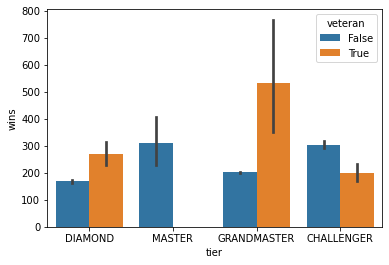

In [53]:
sns.barplot(y = 'wins', x = 'tier', hue = 'veteran', data=DMGC_combined_df)

In [35]:
combined_mastery = pd.merge(full_summoner_mastery, champion_data_1, how = 'left', on = 'championId')

del combined_mastery["Champion Name_x"]

combined_mastery.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

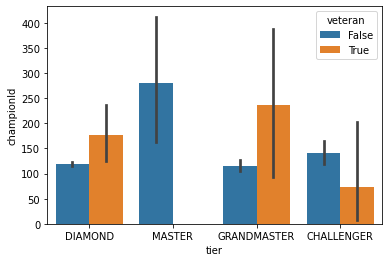

In [44]:
sns.barplot(y = 'championId', x = 'tier', hue = 'veteran', data=DMGC_combined_df)

In [45]:
champion = junior_combined_df['summonerId'].nunique()
champion

29119

In [49]:
sns.barplot(x = 'tier', hue = 'veteran', data= junior_combined_df)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
Diamond = full_summoner_mastery[full_summoner_mastery["tier"] == "DIAMOND"]


In [ ]:
sns.barplot(y = 'wins', x = 'tier', hue = 'veteran', data=DMGC_combined_df)